### importing libraries

In [144]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

### Step 1: Grayscaling

#### Process:

1. **Kernel Selection:** 
   - Choose a grayscale conversion kernel, such as the average method or weighted method, to transform the RGB image into a grayscale image.
   
2. **Convolution Operation:** 
   - Apply the selected kernel to perform convolution on the RGB image, converting each pixel to its corresponding grayscale value.

#### Purpose:

- **Friendly to Operate:** 
  - Grayscaling simplifies image processing tasks by reducing the complexity of color representations. Operating on a single grayscale channel is often easier than dealing with multiple color channels.
  
- **Values 0~255:** 
  - Grayscale images typically use intensity values ranging from 0 to 255, where 0 represents black and 255 represents white. This standardized intensity range facilitates various image processing operations and ensures compatibility with many algorithms and systems.


In [145]:
def rgb_to_grayscale(image_array):
    luminance = np.dot(image_array[..., :3], [0.299, 0.587, 0.114])
    grayscale_array = luminance.astype(np.uint8)
    return grayscale_array

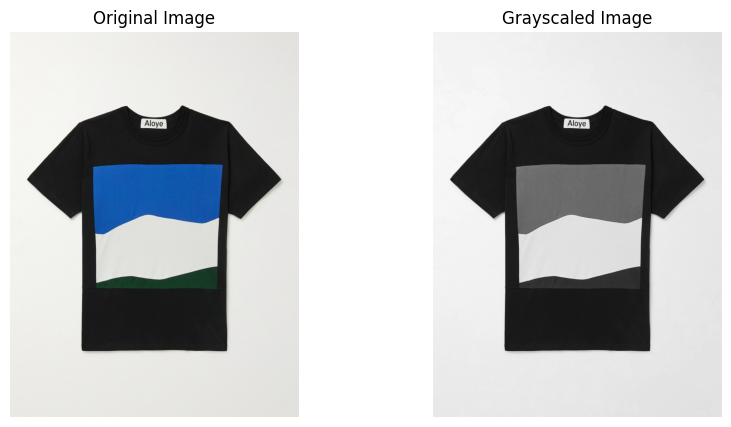

In [146]:
image = cv2.imread('1827.jpg')
gray_image = rgb_to_grayscale(image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscaled Image')
plt.axis('off')

plt.show()

### Step 2: Gaussian Blur

#### Process:

1. **Kernel Selection:** 
   - Select a Gaussian kernel based on the desired blur effect and the amount of smoothing required.
   
2. **Convolution Operation:** 
   - Perform convolution between the input image and the selected Gaussian kernel to blur the image. This involves sliding the kernel over the image and computing the weighted sum of pixel values.

#### Purpose:

- **Noise Reduction:** 
  - Gaussian blur is effective in reducing high-frequency noise, such as salt-and-pepper noise or Gaussian noise, by averaging nearby pixel values.
  
- **Smoothing:** 
  - It smooths out sharp transitions and details in the image, resulting in a softer appearance. This can be useful for hiding imperfections or creating a more aesthetically pleasing output.



In [147]:
def apply_gaussian_blur(image):
    # Define the Gaussian blur kernel
    kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

    # Apply convolution using NumPy's convolve function
    blurred_image = np.zeros_like(image, dtype=float)
    blurred_image = np.convolve(
        image.flatten(), kernel.flatten(), mode='same').reshape(image.shape)

    return blurred_image.astype(np.uint8)

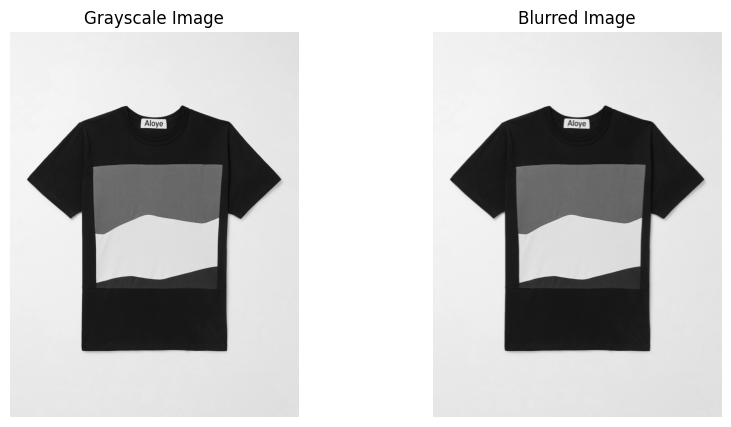

In [148]:
blurred_image = apply_gaussian_blur(gray_image)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')

plt.show()

# Process to Define Gaussian Kernel

## Step 1: Define Kernel Parameters
- **Constant Value (C):** The constant value represents the central weight of the kernel.
- **Standard Deviation (σ):** Also known as sigma, it determines the spread of the Gaussian curve.

## Step 2: Gaussian Kernel Equation
The Gaussian kernel is defined as a function of distance from the center with a Gaussian distribution. It can be represented as:
$$
K(x, y) = C \cdot e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

Where:
- $(x, y)$ represents the distance from the center.
- $ C $ is the constant value.
- $\sigma $ is the standard deviation.


In [149]:
def gaussian_kernel(kernel_size, sigma):
    kernel_range = np.arange(-(kernel_size // 2), kernel_size // 2 + 1)
    kernel = np.exp(-0.5 * (kernel_range ** 2) / sigma ** 2)
    kernel = kernel / np.sum(kernel)
    return kernel

In [150]:
kernel_size = 5
sigma = 0.3 * ((kernel_size - 1) * 0.5 - 1) + 0.8
kernel = gaussian_kernel(kernel_size, sigma)
gaussian_mask = np.outer(kernel, kernel.transpose())

In [151]:
blurred_single_channel = convolve2d(
            gray_image, gaussian_mask, mode='same', boundary='wrap')
blurred = blurred_single_channel.astype(np.uint8)

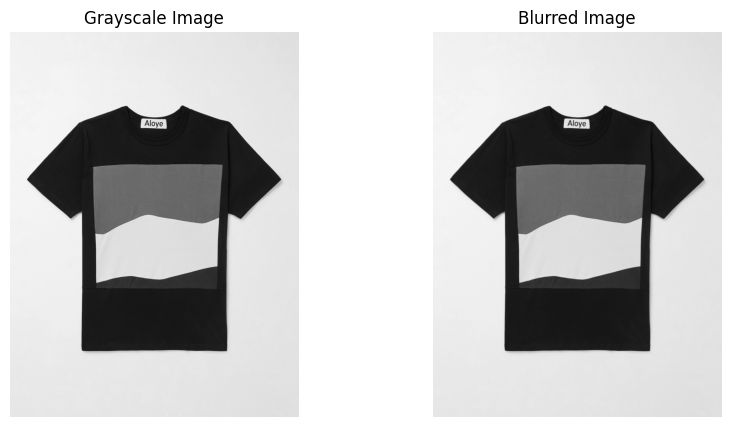

In [152]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')

plt.show()

### Sobel x

- **Borders along x:**
  The Sobel x operator, also known as the vertical edge detector, focuses on detecting edges that are oriented vertically in the image. It applies a convolution operation using the Sobel kernel along the horizontal axis to highlight changes in intensity along the x-direction.

  The Sobel x operator can effectively detect edges with vertical orientation, such as edges of objects or boundaries in the image. It computes the gradient of the image intensity along the x-axis, emphasizing vertical changes in intensity and providing valuable information for edge detection and image enhancement tasks.


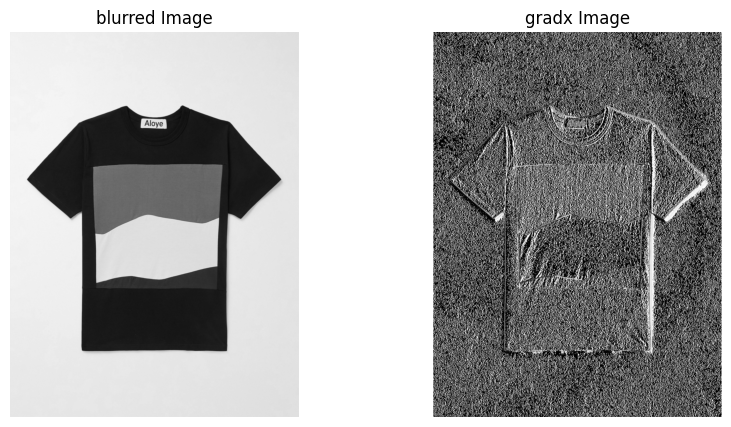

In [153]:
def sobelx(image):
    # Sobel X operator
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    # Apply convolution using NumPy's convolve function
    gradient_x = convolve2d(image, kernel_x, mode='same', boundary='wrap')

    sobel_x_image = np.zeros_like(image)
    sobel_x_image = np.convolve(
        image.flatten(), kernel_x.flatten(), mode='same').reshape(image.shape)

    return gradient_x.astype(np.uint8), sobel_x_image.astype(np.uint8)

gradx1,gradx2 = sobelx(blurred)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title('blurred Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gradx1, cv2.COLOR_BGR2RGB))
plt.title('gradx Image')
plt.axis('off')

plt.show()

### Sobel y

- **Horizontal Border Detection:**
  The Sobel y operator serves as a horizontal border detector by convolving the image with the Sobel kernel along the vertical axis. It emphasizes intensity changes along the y-direction, effectively detecting horizontal edges such as lines or boundaries.


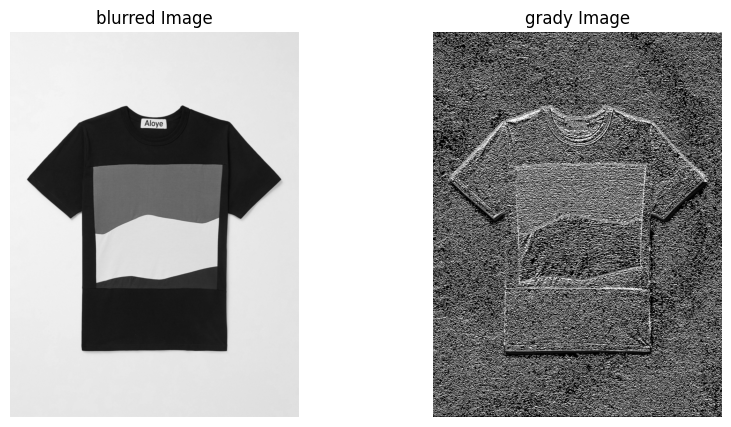

In [154]:
def sobely(image):
    # Sobel Y operator
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    # Apply convolution using NumPy's convolve function
    gradient_y = convolve2d(image, kernel_y, mode='same', boundary='wrap')


    return gradient_y.astype(np.uint8)

grady = sobely(blurred)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title('blurred Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(grady, cv2.COLOR_BGR2RGB))
plt.title('grady Image')
plt.axis('off')

plt.show()

### Sobel Operator

- **Magnitude and Angle Calculation:**
  The Sobel operator combines Sobel x and Sobel y operations to compute both magnitude and angle information for edge detection. It convolves the image with Sobel kernels along both the horizontal and vertical axes.

  - **Magnitude:** The magnitude represents the strength of the edges in the image, calculated as the square root of the sum of squares of Sobel x and Sobel y derivatives.
  - **Angle:** The angle corresponds to the direction of the edges, calculated using the arctan function of the Sobel y derivative divided by the Sobel x derivative.

  By computing both magnitude and angle, the Sobel operator provides comprehensive edge information, enabling tasks such as edge detection, feature extraction, and image segmentation.


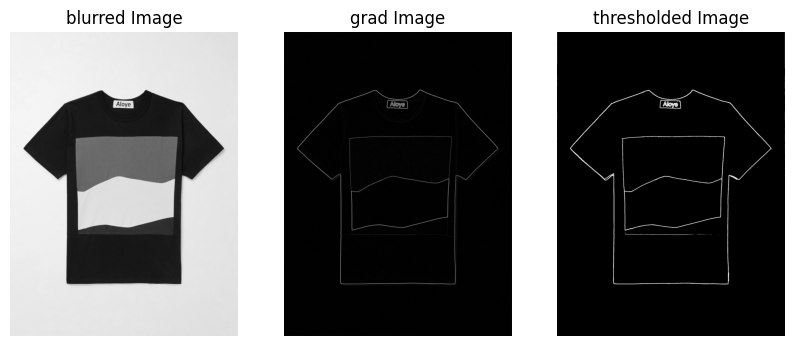

In [155]:
def sobel_filter(image):
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    gradient_x = convolve2d(image, kernel_x, mode='same', boundary='wrap')
    gradient_y = convolve2d(image, kernel_y, mode='same', boundary='wrap')

    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)

    return gradient_magnitude, gradient_direction

grad_mag,grad_ang= sobel_filter(blurred)

threshold = 40  # can change the threshold value here or in the next section
# can detect less intense pixels also
gradient_new = (grad_mag > threshold).astype(np.uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title('blurred Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(grad_mag, cmap='gray')
plt.title('grad Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gradient_new, cmap='gray')
plt.title('thresholded Image')
plt.axis('off')

plt.show()

### Edge Detection and Direction Mapping with Sobel Operator

#### Thresholding and Edge Detection:
- **Threshold Definition:** 
  - Define a threshold value (`threshold`) for edge detection.

- **Border Mask Creation:** 
  - Create a binary mask (`border_mask`) indicating pixels with gradient magnitude above the threshold.

#### Gradient Direction Mapping:
- **Gradient Direction Calculation:**
  - Calculate the gradient direction (`grad_ang`) using the arctan of the gradient magnitudes.

- **Hue Calculation:** 
  - Normalize the gradient angles to the range [0, 255] to represent hues.
  
- **HSV Image Creation:** 
  - Create an HSV image (`hsv_image`) where hue represents the gradient direction and saturation/value are set to maximum.

#### Visualization and Border Reduction:
- **Border Visualization:**
  - Convert the HSV image to RGB for visualization (`rgb_image`).
  
- **Border Reduction:** 
  - The Sobel operator reduces the size of the border in directions where the slope is decreasing or increasing, thus emphasizing the magnitude of the border in those directions.



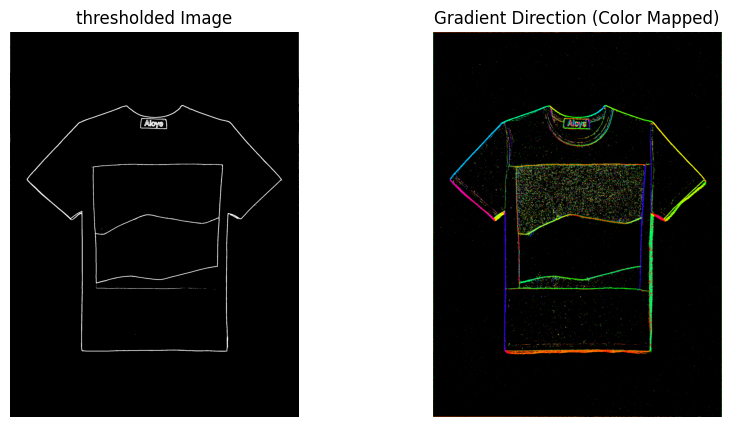

In [156]:
threshold = 10
border_mask = (grad_mag > threshold).astype(np.uint8)


hue = (grad_ang + np.pi) / (2 * np.pi)
hue[hue > 1] -= 1
hue_scaled = np.uint8(hue * 255)
hsv_image = np.zeros((grad_mag.shape[0], grad_mag.shape[1], 3), dtype=np.uint8)
hsv_image[..., 0] = hue_scaled
hsv_image[..., 1] = 255
hsv_image[..., 2] = 255 * border_mask
rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gradient_new, cmap='gray')
plt.title('thresholded Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rgb_image)
plt.title('Gradient Direction (Color Mapped)')
plt.axis('off')

plt.show()

### Non-Maximum Suppression

The `non_maximum_suppression` function performs non-maximum suppression to thin out the edges obtained from the Sobel operator. The process is as follows:

- **Angle Calculation:** 
  - Convert the gradient direction to degrees.

- **Suppression Process:**
  - Iterate through each pixel in the gradient magnitude and direction arrays.
  - Determine the direction of the gradient at each pixel based on its angle.
  - Compare the magnitude of the current pixel with its neighbors in the gradient direction.
  - If the magnitude of the current pixel is greater than or equal to the magnitudes of its neighbors, retain the magnitude; otherwise, suppress it.

- **Output:**
  - Return the resulting suppressed image.

The `magnitude_suppressed` image is then visualized alongside the thresholded gradient image for comparison.



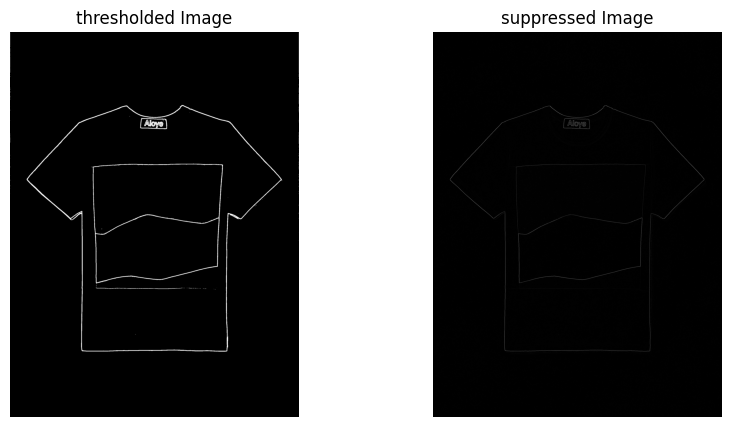

In [157]:
def non_maximum_suppression(magnitude, direction):
    angle = np.degrees(direction) % 180
    suppressed = np.zeros_like(magnitude)

    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
            if (0 <= angle[i, j] < 22) or (158 <= angle[i, j] <= 180):
                neighbor_pixels = [magnitude[i, j+1], magnitude[i, j-1]]
            elif 22 <= angle[i, j] < 67:
                neighbor_pixels = [magnitude[i+1, j-1], magnitude[i-1, j+1]]
            elif 67 <= angle[i, j] < 112:
                neighbor_pixels = [magnitude[i+1, j], magnitude[i-1, j]]
            else:
                neighbor_pixels = [magnitude[i+1, j+1], magnitude[i-1, j-1]]

            if magnitude[i, j] >= max(neighbor_pixels):
                suppressed[i, j] = magnitude[i, j]

    return suppressed

magnitude_suppressed = non_maximum_suppression(grad_mag, grad_ang)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gradient_new, cmap='gray')
plt.title('thresholded Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_suppressed, cmap='gray')
plt.title('suppressed Image')
plt.axis('off')

plt.show()

### Hysteresis Thresholding

The `hysteresis_thresholding` function applies hysteresis thresholding to the input image. Here's a breakdown of the process:

- **Threshold Calculation:**
  - Calculate the high threshold as a percentage of the maximum value in the input image (`high_threshold_ratio`).
  - Calculate the low threshold as a percentage of the high threshold (`low_threshold_ratio`).

- **Edge Classification:**
  - Identify strong edges where the magnitude of the image is greater than or equal to the high threshold.
  - Identify weak edges where the magnitude of the image is between the low and high thresholds.

- **Output Image Generation:**
  - Create an output image where strong edges are marked with intensity 255 and weak edges with intensity 20.
  - Pixels not classified as edges remain 0.

- **Visualization:**
  - Display the suppressed image and the final thresholded image side by side for comparison.



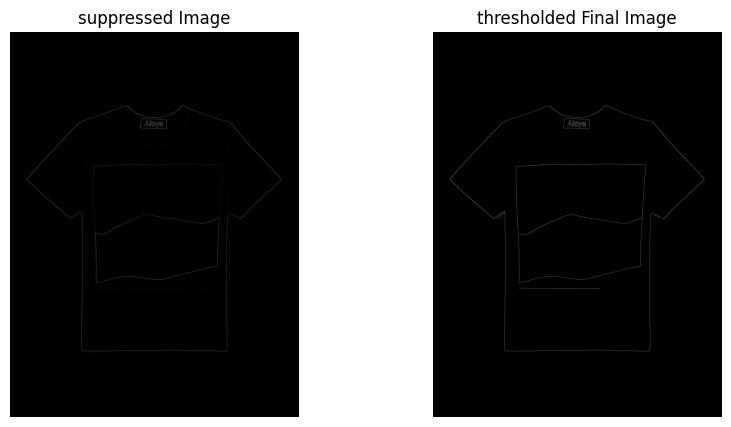

In [158]:
def hysteresis_thresholding(image, low_threshold_ratio=0, high_threshold_ratio=0.1):
    high_threshold = np.max(image) * high_threshold_ratio
    low_threshold = high_threshold * low_threshold_ratio

    strong_edges_row, strong_edges_col = np.where(image >= high_threshold)
    weak_edges_row, weak_edges_col = np.where(
        (image >= low_threshold) & (image < high_threshold))

    output_image = np.zeros_like(image, dtype=np.uint8)
    output_image[strong_edges_row, strong_edges_col] = 255
    output_image[weak_edges_row, weak_edges_col] = 20  # Weak edges
    return output_image


edges = hysteresis_thresholding(magnitude_suppressed)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(magnitude_suppressed, cmap='gray')
plt.title('suppressed Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('thresholded Final Image')
plt.axis('off')

plt.show()

### Adjust Pixel Values

The `adjust_pixel_values` function adjusts pixel values in the input image based on a thresholding scheme. Here's how it works:

- **Thresholding:**
  - Pixels with values less than 50 are set to 0.
  - Pixels with values greater than 200 are set to 255.
  - Pixels with values between 50 and 200 remain unchanged.

- **Output:**
  - Return the adjusted image.

- **Visualization:**
  - Display the original image and the adjusted image side by side for comparison.
  - To check the RGB values, you can run the [`filtering.py`](filtering.py) script in the same directory.

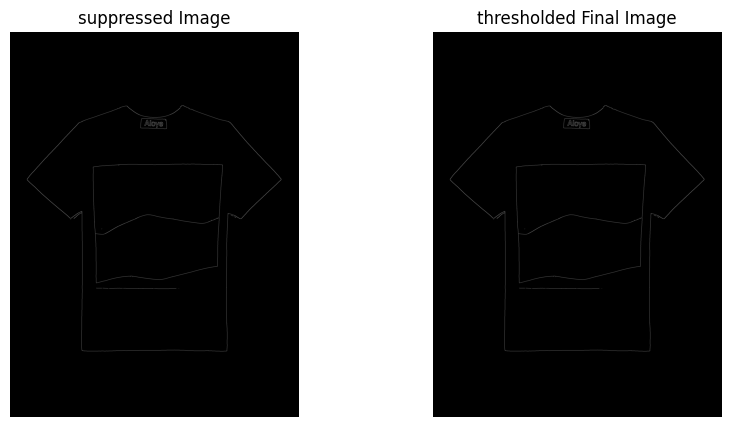

In [159]:
def adjust_pixel_values(image):
    # Thresholding to adjust pixel values
    adjusted_img = np.where(image < 50, 0, np.where(image > 200, 255, image))

    return adjusted_img


enhanced = adjust_pixel_values(edges)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title('suppressed Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced, cmap='gray')
plt.title('thresholded Final Image')
plt.axis('off')

plt.show()

'''
we need the output of a very thin line of border for better detection
'''

### Extract Bordered Portion

The `extract_bordered_portion` function extracts the portion of an image that is bordered by the largest contour detected in the edge image. Here's how it works:

- **Input Validation:**
  - The function checks if the input images (`image`, `edges`, `gray`) are valid. If any of them are `None`, it prints an error message and returns `None`.

- **Contour Detection:**
  - Contours are detected in the `edges` image using the `cv2.findContours` function.

- **Largest Contour Selection:**
  - The contour with the largest area is identified from the detected contours.

- **Minimum Enclosing Rectangle:**
  - A minimum enclosing rectangle is calculated around the largest contour using `cv2.minAreaRect`.

- **Mask Creation:**
  - A mask is created based on the minimum enclosing rectangle to isolate the bordered portion in the original image.

- **Portion Extraction:**
  - The original image is cropped using the mask to extract the bordered portion.

- **Output:**
  - The function returns the extracted bordered portion of the image.

If there are no contours found or if the input images are invalid, appropriate error messages are printed, and `None` is returned.

This function is useful for extracting specific regions of interest from images, particularly areas that are bounded by prominent contours, which can be useful in various image processing applications.

**Note: this part of code is not efficiently working for a part of the dataset so didnt use this method !!.**


In [160]:
def extract_bordered_portion(image, edges, gray):
    if image is None or edges is None or gray is None:
        print("Invalid input. One or more input images are None.")
        return None

    # Find contours
    contours, _ = cv2.findContours(
        edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        print("No contours found.")
        return None

    # Initialize a list to store the areas of the contours
    contour_areas = [cv2.contourArea(contour) for contour in contours]

    # Find the index of the contour with the largest area
    largest_contour_index = contour_areas.index(max(contour_areas))

    # Get the contour with the largest area
    largest_contour = contours[largest_contour_index]

    # Get the minimum enclosing rectangle around the contour
    rect = cv2.minAreaRect(largest_contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    # Crop the original image using the minimum enclosing rectangle
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [box], 0, (255), -1)
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    (x, y, w, h) = cv2.boundingRect(box)
    bordered_portion = masked_image[y:y+h, x:x+w]

    return bordered_portion

### Extract Bordered Portion

The `extract_bordered_portion` function extracts the portion of an image that is bordered by the detected edges. It achieves this by checking the first pixel from each side of the image and drawing an edge there, then cutting the portion bounded by these edges.



In [161]:
def extract_bordered_portion(image, edges, gray):
    height, width = edges.shape[:2]
    top, bottom, left, right = height, 0, width, 0

    # Iterate over the top border
    for y in range(height):
        if edges[y, :].any():  # Check if any edge pixel is present in the row
            top = y
            break

    # Iterate over the bottom border
    for y in range(height - 1, -1, -1):
        if edges[y, :].any():
            bottom = y
            break

    # Iterate over the left border
    for x in range(width):
        if edges[:, x].any():  # Check if any edge pixel is present in the column
            left = x
            break

    # Iterate over the right border
    for x in range(width - 1, -1, -1):
        if edges[:, x].any():
            right = x
            break

    # Cut the bordered portion using the detected borders
    bordered_portion = image[top:bottom+1, left:right+1]

    return bordered_portion


### Final Step

Executing all the code on a single image involves reading the image, converting it to grayscale, applying the Canny edge detection algorithm to detect edges, and then extracting the bordered portion of the image. This process combines the functionalities of edge detection and bordered portion extraction into a single pipeline, resulting in the extraction of the region of interest from the image. 

the single functions i used are breakdown of the canny edge algorithm in the code [`full.py`](../full.py) from [`Enigma.py`](Enigma.py), i used the functions above only not cannyedge directly 






In [162]:
def canny(gray_image, t1, t2):
    blurred_image = apply_gaussian_blur(gray_image)
    # can use both ways
    kernel_size = 5
    sigma = 0.3 * ((kernel_size - 1) * 0.5 - 1) + 0.8
    kernel = gaussian_kernel(kernel_size, sigma)
    gaussian_mask = np.outer(kernel, kernel.transpose())
    # Apply Gaussian blur using kernel convolution
    blurred_single_channel = convolve2d(
        gray_image, gaussian_mask, mode='same', boundary='wrap')
    blurred = blurred_single_channel.astype(np.uint8)

    grad_mag, grad_ang = sobel_filter(blurred)
    thresholdl = t1
    thresholdh = t2

    border_mask = (thresholdh > grad_mag > thresholdl).astype(np.uint8)

    hue = (grad_ang + np.pi) / (2 * np.pi)
    hue[hue > 1] -= 1
    hue_scaled = np.uint8(hue * 255)
    hsv_image = np.zeros(
        (grad_mag.shape[0], grad_mag.shape[1], 3), dtype=np.uint8)
    hsv_image[..., 0] = hue_scaled
    hsv_image[..., 1] = 255
    hsv_image[..., 2] = 255 * border_mask
    rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    # ### Thresholded suppression
    magnitude_suppressed = non_maximum_suppression(grad_mag, grad_ang)
    # ### Connecting edges
    edges = hysteresis_thresholding(magnitude_suppressed)
    # ### enhancing
    enhanced = adjust_pixel_values(edges)
    return enhanced